In [126]:
import sys
assert sys.version_info >= (3,7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import matplotlib.pyplot as pit
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression



In [127]:
import pandas as pd

# 파일 경로
gdp_file = "gdp_per_capita_2020.xlsx"
bli_file = "oecd_bli_2020.csv"



# 데이터 불러오기
gdp_df = pd.read_excel(gdp_file)
bli_df = pd.read_csv(bli_file)

# 1. GDP 데이터 정리 (필요한 컬럼만 선택)
gdp_clean = gdp_df[['Country', 2020]].rename(columns={2020: 'GDP_per_capita'})

# 2. 행복 지수 데이터 정리 (국가별 평균 값 계산)
bli_clean = bli_df.groupby('Country')['Value'].mean().reset_index()
bli_clean.rename(columns={'Value': 'Happiness_Score'}, inplace=True)

# 3. 두 데이터를 국가 기준으로 병합
merged_df = pd.merge(gdp_clean, bli_clean, on='Country', how='inner')

# 정리된 데이터 크기 확인
merged_df.shape


(40, 3)

In [128]:
# 데이터 샘플 확인
gdp_df.head(), bli_df.head()


(               Country                                 Subject Descriptor  \
 0          Afghanistan  Gross domestic product per capita, current prices   
 1              Albania  Gross domestic product per capita, current prices   
 2              Algeria  Gross domestic product per capita, current prices   
 3               Angola  Gross domestic product per capita, current prices   
 4  Antigua and Barbuda  Gross domestic product per capita, current prices   
 
           Units  Scale                      Country/Series-specific Notes  \
 0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
 1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
 2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
 3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
 4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
 
         2020  Estimates Start After  
 0    499.441        

In [129]:
# 1. GDP 데이터 정리 (필요한 컬럼만 선택)
gdp_clean = gdp_df[['Country', 2020]].rename(columns={2020: 'GDP_per_capita'})

# 2. 행복 지수 데이터 정리 (국가별 평균 값 계산)
bli_clean = bli_df.groupby('Country')['Value'].mean().reset_index()
bli_clean.rename(columns={'Value': 'Happiness_Score'}, inplace=True)

# 3. 두 데이터를 국가 기준으로 병합
merged_df = pd.merge(gdp_clean, bli_clean, on='Country', how='inner')

# 정리된 데이터 크기 확인
merged_df.shape


(40, 3)

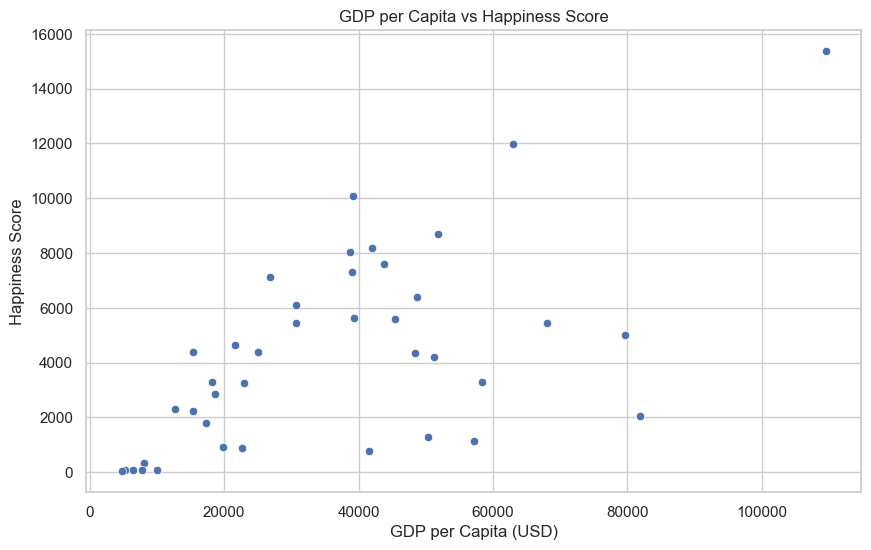

In [130]:

import seaborn as sns

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 산점도 그리기 (GDP vs 행복 지수)
pit.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['GDP_per_capita'], y=merged_df['Happiness_Score'])

# 그래프 레이블
pit.xlabel("GDP per Capita (USD)")
pit.ylabel("Happiness Score")
pit.title("GDP per Capita vs Happiness Score")
pit.show()


Index(['Country', 'GDP_per_capita', 'Happiness_Score'], dtype='object')


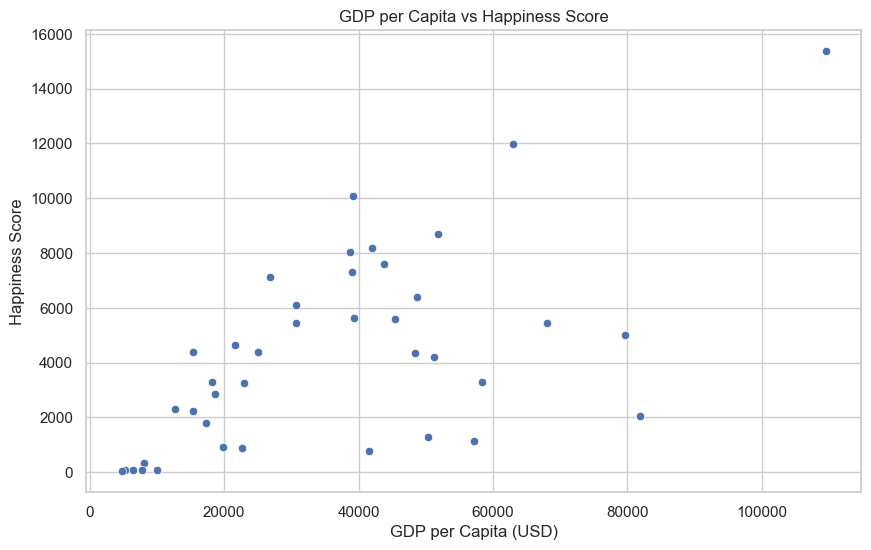

In [131]:
# 열 이름 확인
print(merged_df.columns)

# 열 이름이 다를 경우 수정
merged_df.rename(columns={'GDP per capita': 'GDP_per_capita', 'Happiness Score': 'Happiness_Score'}, inplace=True)

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 산점도 그리기 (GDP vs 행복 지수)
pit.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['GDP_per_capita'], y=merged_df['Happiness_Score'])

# 그래프 레이블
pit.xlabel("GDP per Capita (USD)")
pit.ylabel("Happiness Score")
pit.title("GDP per Capita vs Happiness Score")
pit.show()

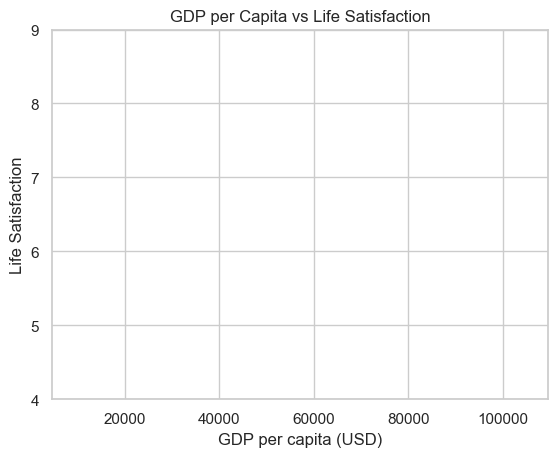

In [ ]:
# 축 범위 설정
min_life_sat = 4
max_life_sat = 9
pit.axis([merged_df['GDP_per_capita'].min(), merged_df['GDP_per_capita'].max(), min_life_sat, max_life_sat])

# 강조할 국가 및 좌표
position_text = {
    "Luxembourg": (95000, 3.0),
    "Switzerland": (75000, 3.8),
    "Ireland": (85000, 3.5),
    "Norway": (90000, 3.6),
    "United States": (54500, 3.8),
}

# 특정 국가 강조
for country, pos_text in position_text.items():
    if country in merged_df['Country'].values:
        country_data = merged_df[merged_df['Country'] == country]
        if not country_data.empty:
            pos_data_x = country_data['GDP_per_capita'].values[0]
            pos_data_y = country_data['Happiness_Score'].values[0]
            
            country_label = "U.S." if country == "United States" else country
            
            # 화살표 표시
            pit.annotate(country_label, xy=(pos_data_x, pos_data_y),
                         xytext=pos_text, fontsize=12,
                         arrowprops=dict(facecolor='black', width=0.5, shrink=0.08, headwidth=5))
            
            # 강조된 국가 빨강색 점
            pit.plot(pos_data_x, pos_data_y, "ro")

# 축 제목
pit.xlabel("GDP per capita (USD)")
pit.ylabel("Life Satisfaction")
pit.title("GDP per Capita vs Life Satisfaction")

pit.show()   


In [133]:
print(merged_df.columns)

Index(['Country', 'GDP_per_capita', 'Happiness_Score'], dtype='object')


In [134]:
top_countries = merged_df.nlargest(5, 'GDP_per_capita')['Country'].tolist()
top_countries

['Luxembourg', 'Switzerland', 'Ireland', 'Norway', 'United States']

In [135]:
bottom_countries = merged_df.nsmallest(5, 'GDP_per_capita')['Country'].tolist()
bottom_countries

['South Africa', 'Colombia', 'Brazil', 'Turkey', 'Mexico']

In [136]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}